In [255]:
# The causalTree package is not in CRAN, the most common R repository.
# To install it, uncomment the next lines as appropriate.
# install.packages("devtools")  # if you don't have this installed yet.
# devtools::install_github('susanathey/causalTree') 

library(causalTree)
# use e.g., install.packages("grf") to install any of the following packages.
library(grf)
library(rpart)
library(glmnet)
library(splines)
library(MASS)
library(lmtest)
library(sandwich)
library(ggplot2)
library(haven)

In [266]:
data <- read_dta("C:/Users/sandr/Dropbox/MGTECON634_Project/data/matching_panel5_treat12.dta")

In [267]:
is.data.frame(data)

[1] TRUE

In [4]:
# stay treat12 tenured level sex age clasification cpelec cpwater

# Clean Data

In [268]:
# Dummy for sex, and categorical values for level and clasification 
data$sex[data$sex == 1] <- 1
data$sex[data$sex == 2] <- 0
data$level <- as.factor(data$level)
data$clasification <- as.factor(data$clasification)

In [370]:
outcome <- "stay"
treatment <- "treat12"
data[,"clasification"] <- as.integer(as.character(data[,"clasification"]))
data[,"level"] <- as.integer(as.character(data[,"level"]))
covariates = c("tenured", "level", "sex", "age", "clasification", 
               "cpelec", "cpwater", "nlat_ie", "nlong_ie")

# Replicate main Results

In [271]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Permanent
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==1 & strict_qualified == 1 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = subset(data, tenured == 1 & strict_qualified == 
    1 & ano == 2016))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98581  0.05739  0.08545  0.11004  0.19524 

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.7054709  0.0176330  40.009   <2e-16 ***
treat12                 0.0002453  0.0040631   0.060   0.9519    
tenured                        NA         NA      NA       NA    
sex                    -0.0094226  0.0040820  -2.308   0.0210 *  
age                     0.0037790  0.0002617  14.439   <2e-16 ***
factor(level)2          0.0083060  0.0099193   0.837   0.4024    
factor(level)3          0.0049741  0.0113954   0.436   0.6625    
factor(clasification)2 -0.0086832  0.0065443  -1.327   0.1846    
factor(clasification)3 -0.0004257  0.0073458  -0.058   0.9538    
cpelec                  0.0227707  0.0094413   2.412   0.0159 *  
cpwater   

In [272]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Qualified Temporary
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==0 & strict_qualified == 1 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = subset(data, tenured == 0 & strict_qualified == 
    1 & ano == 2016))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4330 -0.2964 -0.2522  0.6522  0.8336 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             0.110352   0.020276   5.442 5.30e-08 ***
treat12                 0.047713   0.006041   7.898 2.94e-15 ***
tenured                       NA         NA      NA       NA    
sex                     0.007348   0.006219   1.181   0.2374    
age                     0.003071   0.000405   7.584 3.47e-14 ***
factor(level)2          0.004622   0.008742   0.529   0.5970    
factor(level)3          0.009403   0.011835   0.794   0.4269    
factor(clasification)2 -0.008398   0.009140  -0.919   0.3582    
factor(clasification)3  0.062801   0.010961   5.729 1.02e-08 ***
cpelec                 -0.020036   0.010036  -1.996   0.0459 *  
cpwater                 0.00993

In [273]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Unqualified Temporary
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater)
ols <- lm(fmla, data=subset(data, tenured==0 & strict_qualified == 0 & ano== 2016 ))
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
ols.res


t test of coefficients:

                         Estimate Std. Error t value  Pr(>|t|)    
(Intercept)             0.1248870  0.0494152  2.5273 0.0115435 *  
treat12                 0.0408633  0.0209398  1.9515 0.0510916 .  
sex                    -0.0022900  0.0201888 -0.1134 0.9096973    
age                     0.0040742  0.0010582  3.8501 0.0001205 ***
factor(level)2         -0.0560187  0.0254597 -2.2003 0.0278596 *  
factor(level)3         -0.0599011  0.0321866 -1.8611 0.0628302 .  
factor(clasification)2  0.0320481  0.0249825  1.2828 0.1996507    
factor(clasification)3  0.0912484  0.0297241  3.0698 0.0021602 ** 
cpelec                 -0.0072515  0.0189478 -0.3827 0.7019619    
cpwater                -0.0298502  0.0211662 -1.4103 0.1585591    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


# Via causal trees

In [11]:
# # Only valid for randomized data!
# fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))
# X <- model.matrix(fmla, data)

In [12]:
# fmla <- formula(stay ~  tenured + sex + age)
# fmla

In [13]:
# # Prepare dataset
# fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# X <- model.matrix(fmla, data)

In [14]:
#stay treat12 tenured level sex age clasification cpelec cpwater

## Data from temporary teachers in 2016

In [274]:
data_main_col <- data.frame(data$stay, data$treat12,data$tenured, 
                            data$level, data$sex, data$age, data$clasification, 
                            data$cpelec, data$cpwater, data$nlat_ie, data$nlong_ie,
                           data$x_dim, data$y_dim, data$ano)
 
names(data_main_col) <- c('stay', 'treat12', 'tenured', 'level', 'sex', 'age', 
                       'clasification', 'cpelec', 'cpwater', "nlat_ie", "nlong_ie", "x_dim", "y_dim", "ano")
data_clean = na.omit(data_main_col)

In [275]:
data_clean <- subset(data_clean, ano== 2016 & tenured == 0)

In [276]:
dim(data_clean)

[1] 29606    14

# Using Blocks

In [277]:
# Treatment Effect on Retention for Teachers at Isolated/Rural Boundary
# Permanent
fmla <- formula(stay ~  treat12 + tenured + sex + age + 
                        factor(level) + factor(clasification) 
                        + cpelec + cpwater + x_dim + y_dim)
ols <- lm(fmla, data=data_clean)
ols.res <- coeftest(ols, vcov=vcovHC(ols, type='HC2'))
#ols.res
summary(ols)


Call:
lm(formula = fmla, data = data_clean)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5335 -0.2946 -0.2451  0.6407  0.8880 

Coefficients: (1 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -9.879e-02  2.594e-02  -3.808  0.00014 ***
treat12                 4.380e-02  5.730e-03   7.645 2.16e-14 ***
tenured                        NA         NA      NA       NA    
sex                     6.050e-03  5.816e-03   1.040  0.29832    
age                     3.172e-03  3.581e-04   8.858  < 2e-16 ***
factor(level)2         -4.513e-03  8.048e-03  -0.561  0.57491    
factor(level)3          1.109e-03  1.080e-02   0.103  0.91825    
factor(clasification)2 -3.321e-03  8.413e-03  -0.395  0.69304    
factor(clasification)3  6.420e-02  1.002e-02   6.407 1.51e-10 ***
cpelec                  3.368e-03  8.505e-03   0.396  0.69208    
cpwater                 2.863e-02  5.929e-03   4.829 1.38e-06 ***
x_dim        

In [278]:
# Dividing data into three subsets
indices <- split(seq(nrow(data_clean)), sort(seq(nrow(data_clean)) %% 3))
names(indices) <- c('split', 'est', 'test')

In [279]:
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)
fmla

stay ~ tenured + sex + age + factor(level) + factor(clasification) + 
    cpelec + cpwater + x_dim + y_dim

In [280]:
dim(data_clean)

[1] 29606    14

In [281]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=data_clean[indices$split,],
  treatment=data_clean[indices$split, treatment],
  est_data=data_clean[indices$est,],
  est_treatment=data_clean[indices$est, treatment],
  minsize=100,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)


[1] 2
[1] "CT"


In [282]:
# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

In [283]:
# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)
cp.optimal <- ct.cptable[cp.selected, "CP"]

In [284]:
# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

In [285]:
# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data_clean[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

In [286]:
num.leaves

[1] 6

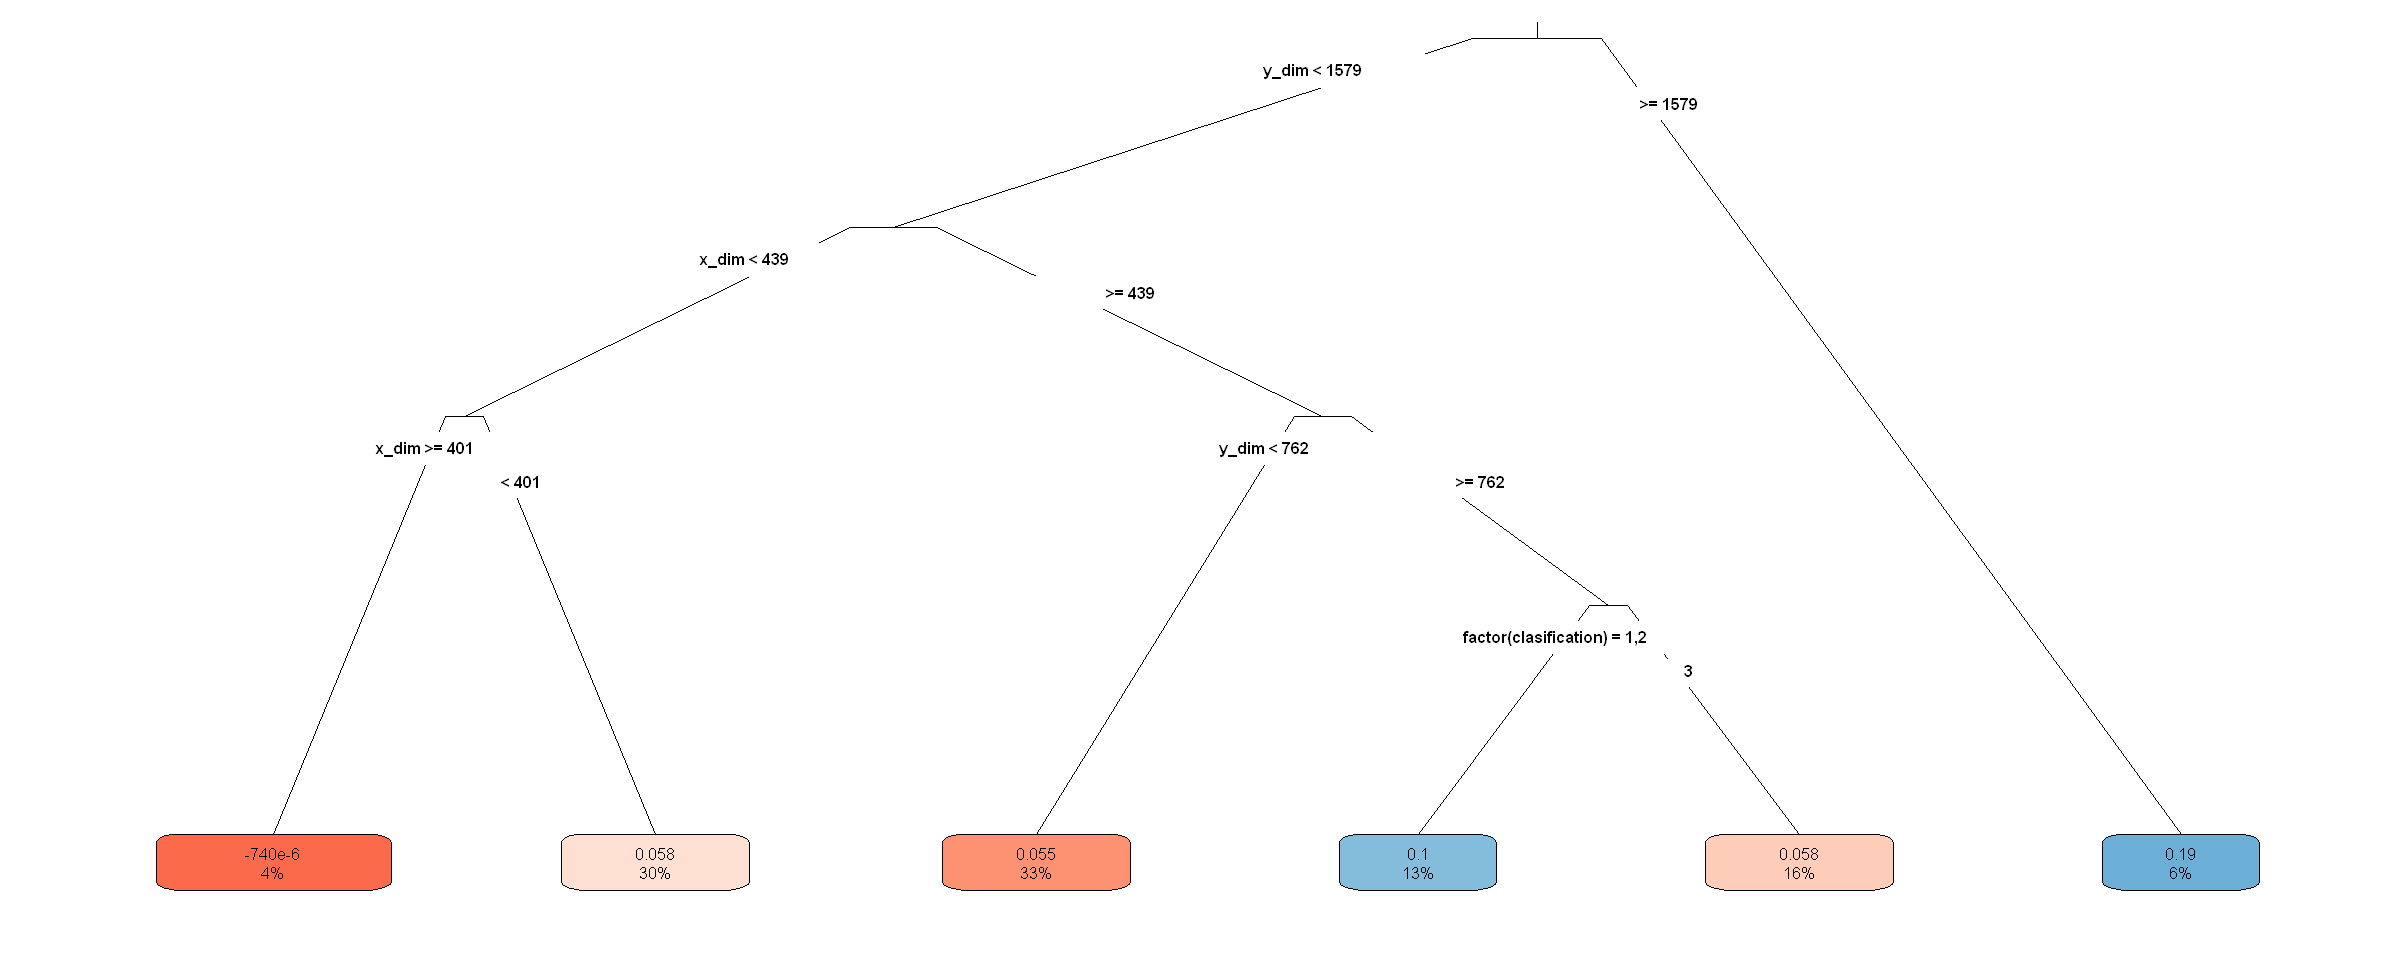

In [291]:
options(repr.plot.width=20, repr.plot.height=8)
rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu", # Palette for coloring the node
  cex = 0.8,
  xcompact=FALSE,
  ycompact=FALSE)

# Using Lat and Longitud

In [315]:
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + nlat_ie + nlong_ie)
fmla

stay ~ tenured + sex + age + factor(level) + factor(clasification) + 
    cpelec + cpwater + nlat_ie + nlong_ie

[1] 2
[1] "CT"


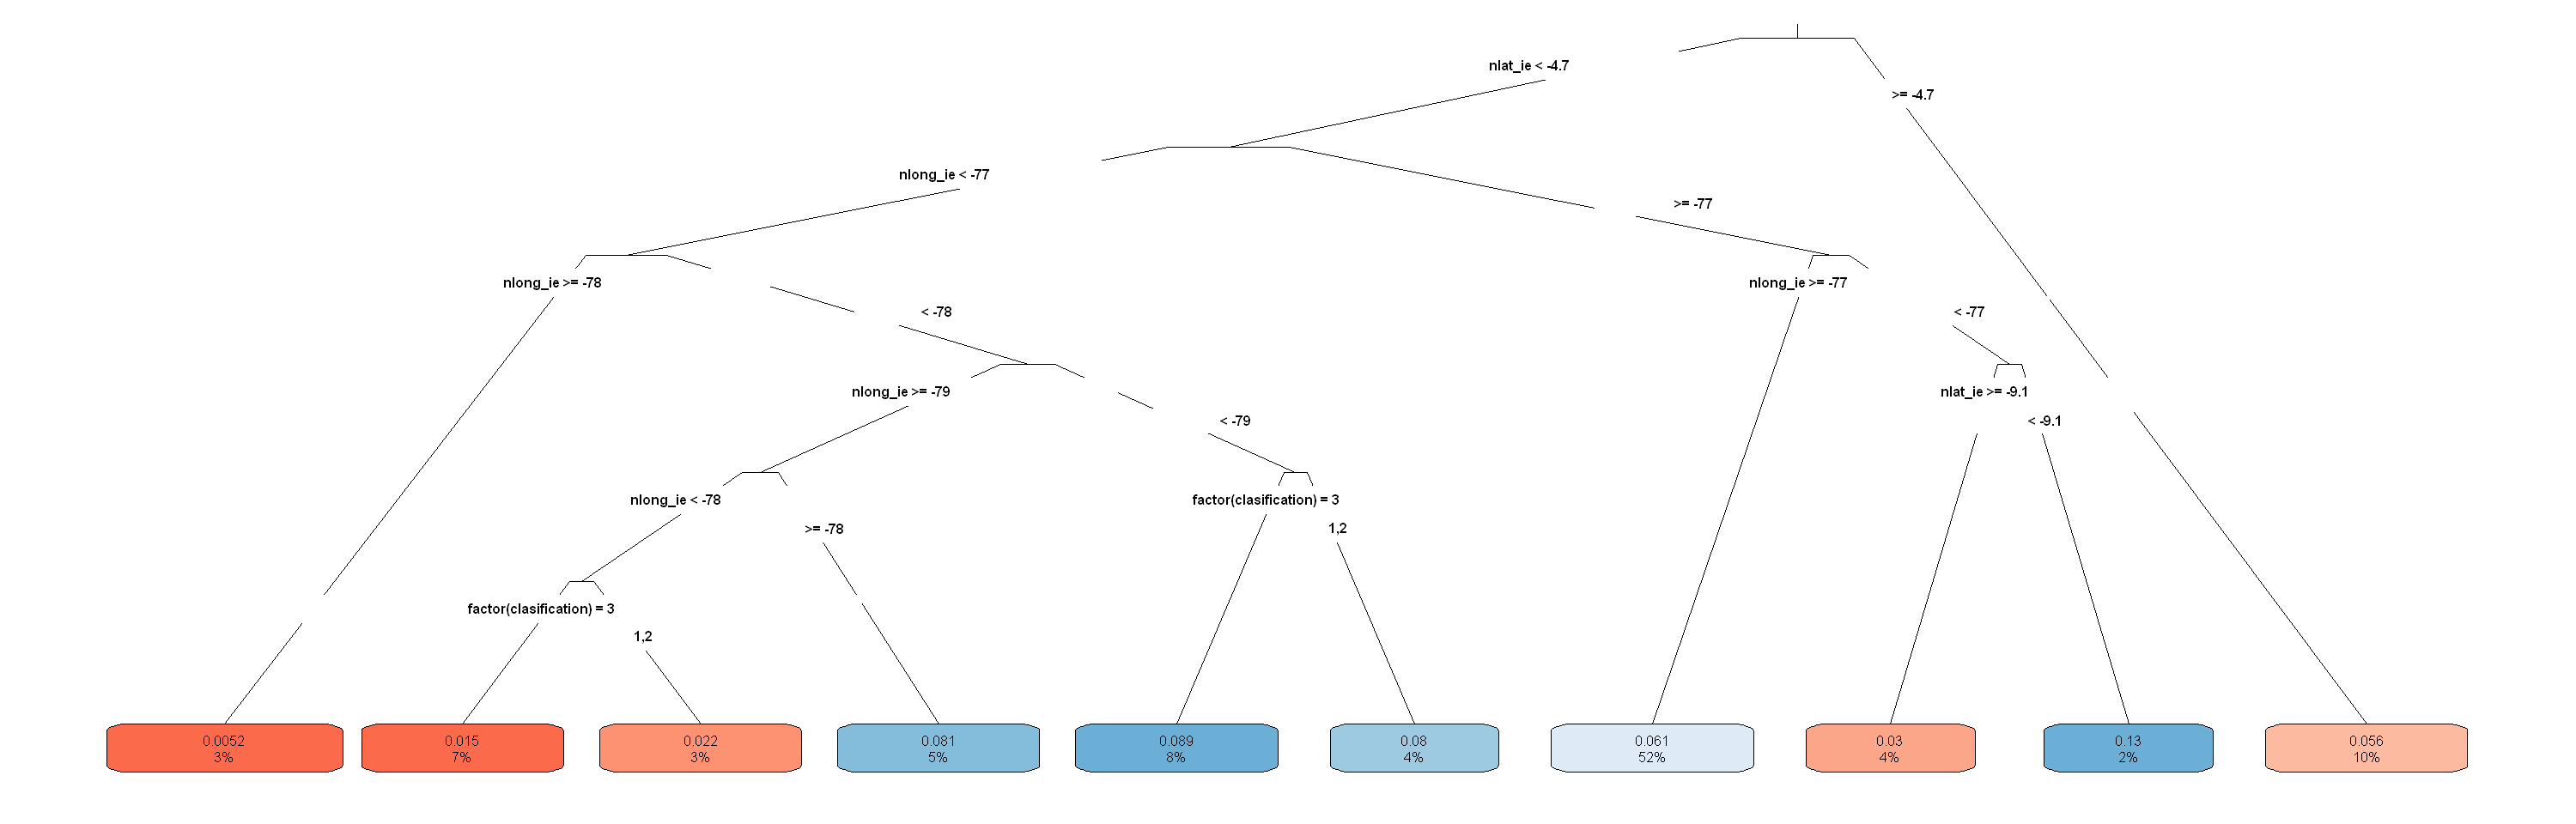

In [316]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=data_clean[indices$split,],
  treatment=data_clean[indices$split, treatment],
  est_data=data_clean[indices$est,],
  est_treatment=data_clean[indices$est, treatment],
  minsize=120,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)

# Table of cross-validated values by tuning parameter.
ct.cptable <- as.data.frame(ct.unpruned$cptable)

# Obtain optimal complexity parameter to prune tree.
cp.selected <- which.min(ct.cptable$xerror)
cp.optimal <- ct.cptable[cp.selected, "CP"]

# Prune the tree at optimal complexity parameter.
ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# Predict point estimates (on estimation sample)
tau.hat.est <- predict(ct.pruned, newdata=data_clean[indices$est,])

# Create a factor column 'leaf' indicating leaf assignment in the estimation set
num.leaves <- length(unique(tau.hat.est))
leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

options(repr.plot.width=25, repr.plot.height=8)
plot <- rpart.plot(
  x=ct.pruned,        # Pruned tree
  type=3,             # Draw separate split labels for the left and right directions
  fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
  leaf.round=1,       # Rounding of the corners of the leaf node boxes
  extra=100,          # Display the percentage of observations in the node
  branch=.1,          # Shape of the branch lines
  box.palette="RdBu", # Palette for coloring the node
  cex = 0.8,
  xcompact=FALSE,
  ycompact=FALSE)

In [31]:
# # Dividing data into three subsets
# indices <- split(seq(nrow(data_clean_2016)), sort(seq(nrow(data_clean_2016)) %% 3))
# names(indices) <- c('split', 'est', 'test')

In [32]:
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater )

# # Fitting the forest
# ct.unpruned <- honest.causalTree(
#   formula=fmla,            # Define the model
#   data=data_clean_2016[indices$split,],
#   treatment=data_clean_2016[indices$split, treatment],
#   est_data=data_clean_2016[indices$est,],
#   est_treatment=data_clean_2016[indices$est, treatment],
#   minsize=1,                 # Min. number of treatment and control cases in each leaf
#   HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
#   # We recommend not changing the parameters below
#   split.Rule="CT",            # Define the splitting option
#   cv.option="TOT",            # Cross validation options
#   cp=0,                       # Complexity parameter
#   split.Honest=TRUE,          # Use honesty when splitting
#   cv.Honest=TRUE              # Use honesty when performing cross-validation
# )

# # Table of cross-validated values by tuning parameter.
# ct.cptable <- as.data.frame(ct.unpruned$cptable)

# # Obtain optimal complexity parameter to prune tree.
# cp.selected <- which.min(ct.cptable$xerror)
# cp.optimal <- ct.cptable[cp.selected, "CP"]

# # Prune the tree at optimal complexity parameter.
# ct.pruned <- prune(tree=ct.unpruned, cp=cp.optimal)

# # Predict point estimates (on estimation sample)
# tau.hat.est <- predict(ct.pruned, newdata=data_clean_2016[indices$est,])

# # Create a factor column 'leaf' indicating leaf assignment in the estimation set
# num.leaves <- length(unique(tau.hat.est))
# leaf <- factor(tau.hat.est, levels=sort(unique(tau.hat.est)), labels = seq(num.leaves))

# rpart.plot(
#   x=ct.pruned,        # Pruned tree
#   type=3,             # Draw separate split labels for the left and right directions
#   fallen=TRUE,        # Position the leaf nodes at the bottom of the graph
#   leaf.round=1,       # Rounding of the corners of the leaf node boxes
#   extra=100,          # Display the percentage of observations in the node
#   branch=.1,          # Shape of the branch lines
#   box.palette="RdBu") # Palette for coloring the node

In [33]:
# Assuming discontinuity generates RCT

In [317]:
# Auxiliary function to computes adjusted p-values 
# following the Romano-Wolf method.
# For a reference, see http://ftp.iza.org/dp12845.pdf page 8
#  t.orig: vector of t-statistics from original model
#  t.boot: matrix of t-statistics from bootstrapped models
romano_wolf_correction <- function(t.orig, t.boot) {
  abs.t.orig <- abs(t.orig)
  abs.t.boot <- abs(t.boot)
  abs.t.sorted <- sort(abs.t.orig, decreasing = TRUE)

  max.order <- order(abs.t.orig, decreasing = TRUE)
  rev.order <- order(max.order)

  M <- nrow(t.boot)
  S <- ncol(t.boot)

  p.adj <- rep(0, S)
  p.adj[1] <- mean(apply(abs.t.boot, 1, max) > abs.t.sorted[1])
  for (s in seq(2, S)) {
    cur.index <- max.order[s:S]
    p.init <- mean(apply(abs.t.boot[, cur.index, drop=FALSE], 1, max) > abs.t.sorted[s])
    p.adj[s] <- max(p.init, p.adj[s-1])
  }
  p.adj[rev.order]
}

# Computes adjusted p-values for linear regression (lm) models.
#    model: object of lm class (i.e., a linear reg model)
#    indices: vector of integers for the coefficients that will be tested
#    cov.type: type of standard error (to be passed to sandwich::vcovHC)
#    num.boot: number of null bootstrap samples. Increase to stabilize across runs.
# Note: results are probabilitistic and may change slightly at every run. 
#
# Adapted from the p_adjust from from the hdm package, written by Philipp Bach.
# https://github.com/PhilippBach/hdm_prev/blob/master/R/p_adjust.R
summary_rw_lm <- function(model, indices=NULL, cov.type="HC2", num.boot=10000) {

  if (is.null(indices)) {
    indices <- 1:nrow(coef(summary(model)))
  }
  # Grab the original t values.
  summary <- coef(summary(model))[indices,,drop=FALSE]
  t.orig <- summary[, "t value"]

  # Null resampling.
  # This is a trick to speed up bootstrapping linear models.
  # Here, we don't really need to re-fit linear regressions, which would be a bit slow.
  # We know that betahat ~ N(beta, Sigma), and we have an estimate Sigmahat.
  # So we can approximate "null t-values" by
  #  - Draw beta.boot ~ N(0, Sigma-hat) --- note the 0 here, this is what makes it a *null* t-value.
  #  - Compute t.boot = beta.boot / sqrt(diag(Sigma.hat))
  Sigma.hat <- vcovHC(model, type=cov.type)[indices, indices]
  se.orig <- sqrt(diag(Sigma.hat))
  num.coef <- length(se.orig)
  beta.boot <- mvrnorm(n=num.boot, mu=rep(0, num.coef), Sigma=Sigma.hat)
  t.boot <- sweep(beta.boot, 2, se.orig, "/")
  p.adj <- romano_wolf_correction(t.orig, t.boot)

  result <- cbind(summary[,c(1,2,4),drop=F], p.adj)
  colnames(result) <- c('Estimate', 'Std. Error', 'Orig. p-value', 'Adj. p-value')
  result
}

In [318]:
# This is only valid in randomized datasets.
fmla <- paste0(outcome, ' ~ ', paste0(treatment, '* leaf'))
if (num.leaves == 1) {
  print("Skipping since there's a single leaf.")

} else if (num.leaves == 2) {
  # if there are only two leaves, no need to correct for multiple hypotheses
  ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
  coeftest(ols, vcov=vcovHC(ols, 'HC2'))[4,,drop=F]

} else {
  # if there are three or more leaves, use Romano-Wolf test correction 
  ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
  interact <- which(sapply(names(coef(ols)), function(x) grepl(paste0(treatment, ":"), x)))
  summary_rw_lm(ols, indices=interact, cov.type = 'HC2')
}

,Estimate,Std. Error,Orig. p-value,Adj. p-value
treat12:leaf2,-0.037310399,0.07038027,0.5960409,0.9803
treat12:leaf3,0.022560656,0.08151141,0.7819576,0.9830
treat12:leaf4,0.099243629,0.07876723,0.2077241,0.6493
treat12:leaf5,-0.029849596,0.06692916,0.6556193,0.9830
treat12:leaf6,-0.040622018,0.06072958,0.5035806,0.9474
treat12:leaf7,-0.092716693,0.07650302,0.2255768,0.6509
treat12:leaf8,0.026422591,0.07638460,0.7294165,0.9830
treat12:leaf9,0.026939916,0.06914270,0.6968233,0.9830
treat12:leaf10,-0.005272767,0.09226791,0.9544303,0.9830


In [36]:
# data 

# Average Covariate values wihtin each leaf

In [322]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

In [323]:
data <- data_clean

In [39]:
# covariate = "clasification"

# fmla <- formula(paste0(covariate, "~ 0 + leaf"))
# ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
# ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))

# # Retrieve results
# avg <- ols.res[,1]
# stderr <- ols.res[,2]

# # Tally up results
# data.frame(covariate, avg, stderr, leaf=paste0("Leaf", seq(num.leaves)), 
#          # Used for coloring
#          scaling=pnorm((avg - mean(avg))/sd(avg)), 
#          # We will order based on how much variation is 'explain' by the averages
#          # relative to the total variation of the covariate in the data
#          variation=sd(avg) / sd(data[,covariate]),
#          # String to print in each cell in heatmap below
#          labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))

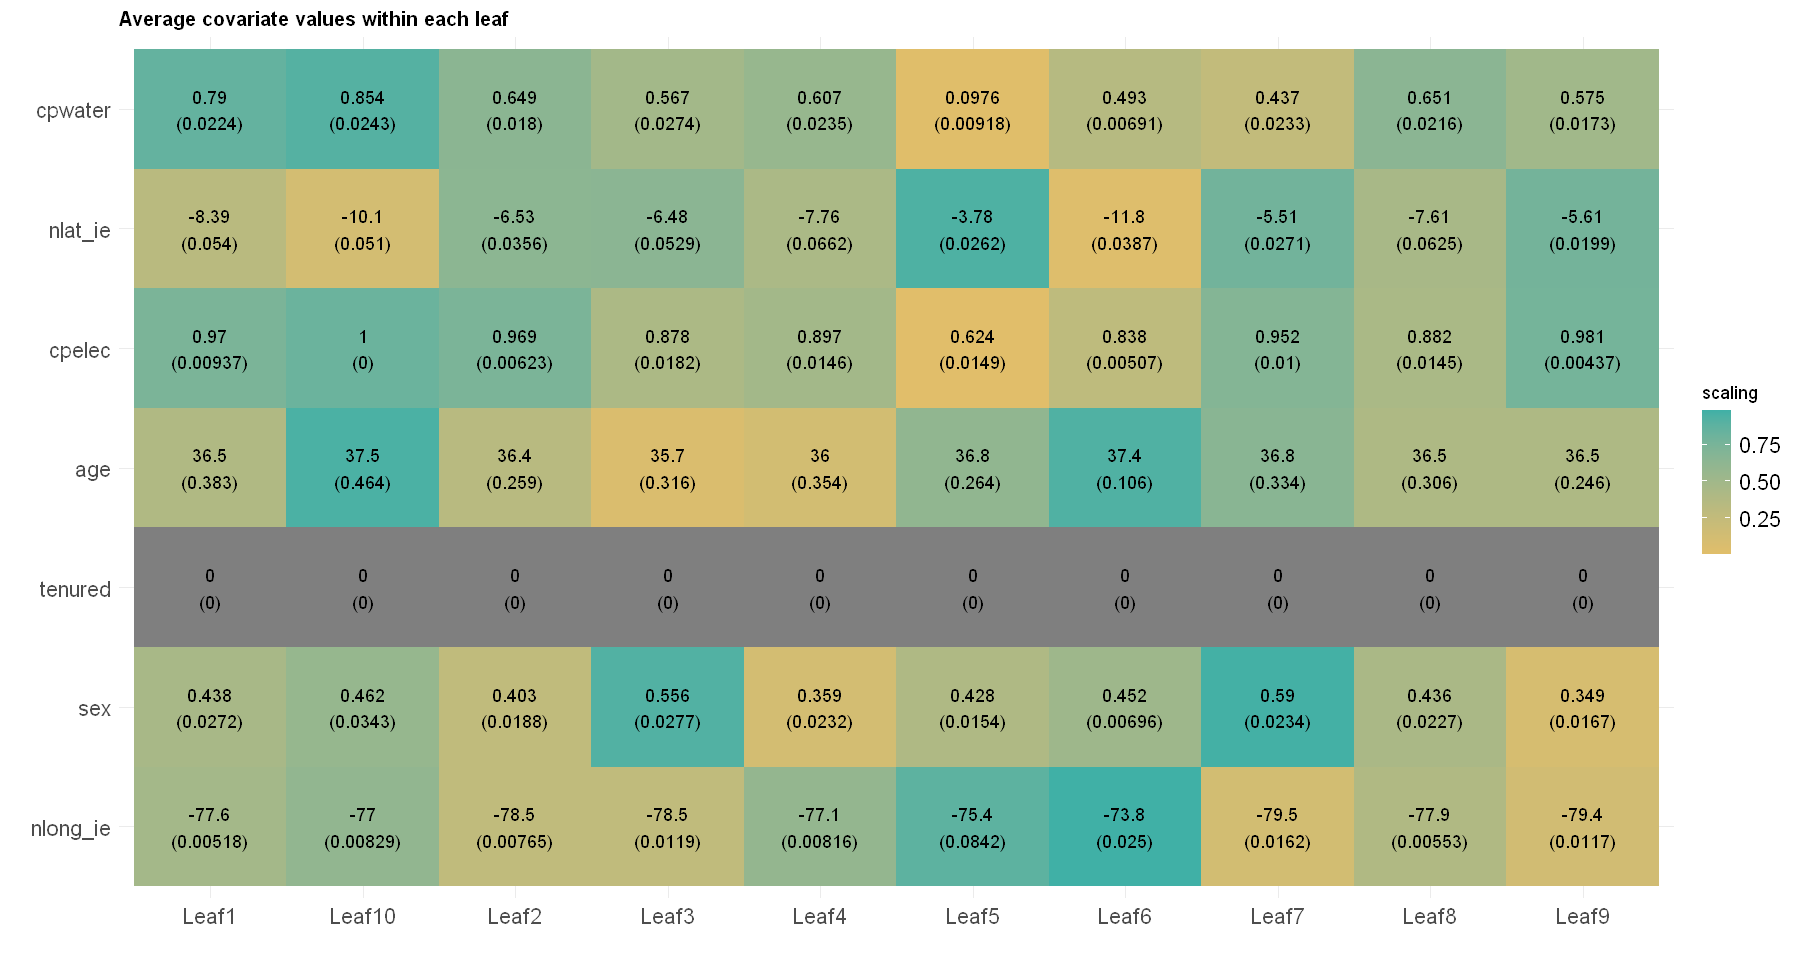

In [328]:
df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per leaf (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + leaf"))
      ols <- lm(fmla, data=transform(data[indices$est,], leaf=leaf))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, leaf=paste0("Leaf", seq(num.leaves)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)

df <- do.call(rbind, df)

# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))


# plot heatmap
options(repr.plot.width=15, repr.plot.height=8)
ggplot(df) + 
    aes(leaf, covariate, fig(50,50)) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within each leaf")) +
    theme_minimal() + 
    ylab("") + xlab("") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

# Via grf

## 1. Using LATITUDE and LONGITUDE

In [329]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + nlat_ie + nlong_ie)

In [330]:
# Preparing data to fit a causal forest
# fmla <- formula(paste0("~ 0 +", paste0(covariates, collapse="+")))
XX <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]

In [331]:
forest.tau <- causal_forest(XX, Y, W)

In [332]:
# Get predictions from forest fitted above.
tau.hat <- predict(forest.tau)$predictions  # tau(X) estimates

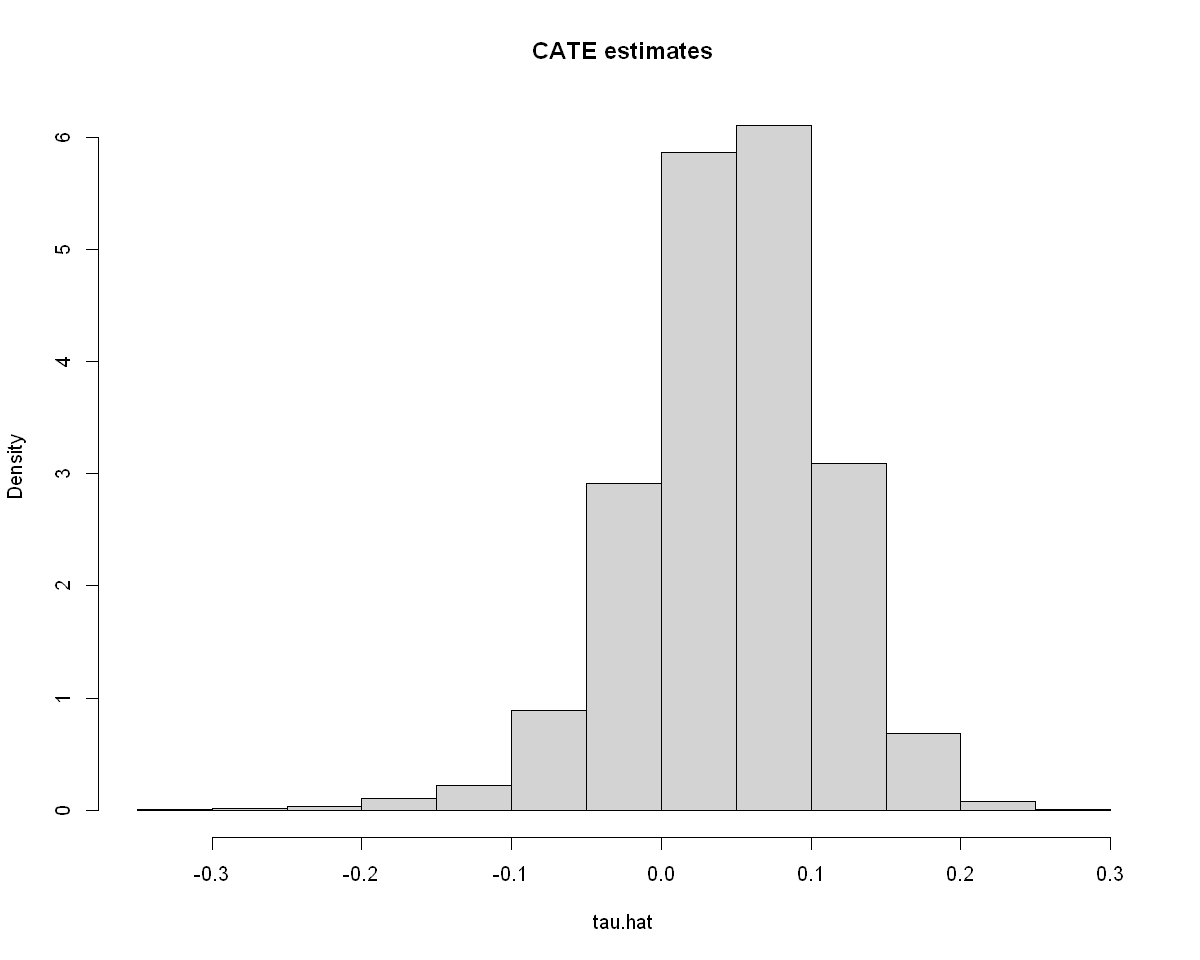

In [334]:
options(repr.plot.width=10, repr.plot.height=8)
# Do not use this for assessing heterogeneity. See text above.
hist(tau.hat, main="CATE estimates", freq=F)

### Data-driven subgroups

In [335]:
# Valid randomized data and observational data with unconfoundedness+overlap.
# Note: read the comments below carefully. 
# In randomized settings, do not estimate forest.e and e.hat; use known assignment probs.

# Prepare dataset
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + nlat_ie + nlong_ie)
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
n <- nrow(data)

# Number of rankings that the predictions will be ranking on 
# (e.g., 2 for above/below median estimated CATE, 5 for estimated CATE quintiles, etc.)
num.rankings <- 5  

# Prepare for data.splitting
# Assign a fold number to each observation.
# The argument 'clusters' in the next step will mimick K-fold cross-fitting.
num.folds <- 10
folds <- sort(seq(n) %% num.folds) + 1

# Comment or uncomment depending on your setting.
# Observational setting with unconfoundedness+overlap (unknown assignment probs):
# forest <- causal_forest(X, Y, W, clusters = folds)
# Randomized settings with fixed and known probabilities (here: 0.5).
forest <- causal_forest(X, Y, W, W.hat=.5, clusters = folds)

# Retrieve out-of-bag predictions.
# Predictions for observation in fold k will be computed using 
# trees that were not trained using observations for that fold.
tau.hat <- predict(forest)$predictions


# Rank observations *within each fold* into quintiles according to their CATE predictions.
ranking <- rep(NA, n)
for (fold in seq(num.folds)) {
  tau.hat.quantiles <- quantile(tau.hat[folds == fold], probs = seq(0, 1, by=1/num.rankings))
  ranking[folds == fold] <- cut(tau.hat[folds == fold], tau.hat.quantiles, include.lowest=TRUE,labels=seq(num.rankings))
}

In [336]:
# Valid only in randomized settings.
# Average difference-in-means within each ranking

# Formula y ~ 0 + ranking + ranking:w
fmla <- paste0(outcome, " ~ 0 + ranking + ranking:", treatment)
ols.ate <- lm(fmla, data=transform(data, ranking=factor(ranking)))
ols.ate <- coeftest(ols.ate, vcov=vcovHC(ols.ate, type='HC2'))
interact <- which(grepl(":", rownames(ols.ate)))
ols.ate <- data.frame("ols", paste0("Q", seq(num.rankings)), ols.ate[interact, 1:2])
rownames(ols.ate) <- NULL # just for display
colnames(ols.ate) <- c("method", "ranking", "estimate", "std.err")
ols.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
ols,Q1,-0.01630461,0.01193988
ols,Q2,0.04648880,0.01188715
ols,Q3,0.04990109,0.01197137
ols,Q4,0.07366755,0.01203887
ols,Q5,0.05985887,0.01205006


In [337]:
# Computing AIPW scores.
tau.hat <- predict(forest)$predictions
e.hat <- forest$W.hat # P[W=1|X]
m.hat <- forest$Y.hat # E[Y|X]

# Estimating mu.hat(X, 1) and mu.hat(X, 0) for obs in held-out sample
# Note: to understand this, read equations 6-8 in this vignette:
# https://grf-labs.github.io/grf/articles/muhats.html
mu.hat.0 <- m.hat - e.hat * tau.hat        # E[Y|X,W=0] = E[Y|X] - e(X)*tau(X)
mu.hat.1 <- m.hat + (1 - e.hat) * tau.hat  # E[Y|X,W=1] = E[Y|X] + (1 - e(X))*tau(X)

# AIPW scores
aipw.scores <- tau.hat + W / e.hat * (Y -  mu.hat.1) - (1 - W) / (1 - e.hat) * (Y -  mu.hat.0)
ols <- lm(aipw.scores ~ 0 + factor(ranking))
forest.ate <- data.frame("aipw", paste0("Q", seq(num.rankings)), coeftest(ols, vcov=vcovHC(ols, "HC2"))[,1:2])
colnames(forest.ate) <- c("method", "ranking", "estimate", "std.err")
rownames(forest.ate) <- NULL # just for display
forest.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
aipw,Q1,-0.01840531,0.01145123
aipw,Q2,0.04353060,0.01152680
aipw,Q3,0.03339818,0.01142979
aipw,Q4,0.04647950,0.01148323
aipw,Q5,0.03582699,0.01155839


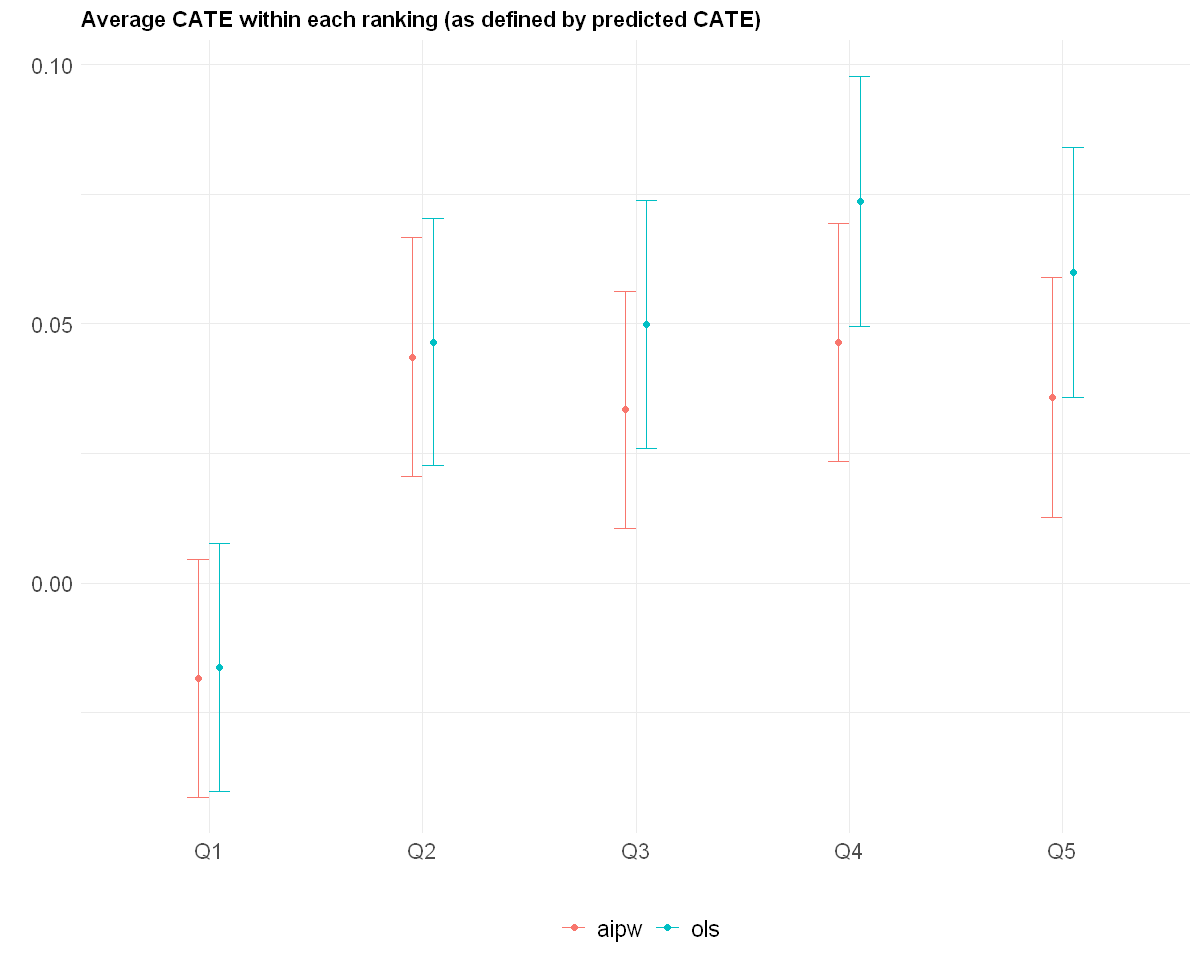

In [341]:
# Concatenate the two results.
res <- rbind(forest.ate, ols.ate)

# Plotting the point estimate of average treatment effect 
# and 95% confidence intervals around it.
options(repr.plot.width=10, repr.plot.height=8)
ggplot(res) +
  aes(x = ranking, y = estimate, group=method, color=method, fig(50,50)) + 
  geom_point(position=position_dodge(0.2)) +
  geom_errorbar(aes(ymin=estimate-2*std.err, ymax=estimate+2*std.err), width=.2, position=position_dodge(0.2)) +
  ylab("") + xlab("") +
  ggtitle("Average CATE within each ranking (as defined by predicted CATE)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
        axis.text=element_text(size=13), 
        legend.position="bottom", legend.title = element_blank(), legend.text = element_text(size=14))

### Test predictions using difference-in-means estimator

In [342]:
# Valid in randomized settings only.

# y ~ ranking + w + ranking:w
fmla <- paste0(outcome, "~ ranking + ", treatment, " + ranking:", treatment) 
ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
interact <- which(sapply(names(coef(ols)), function(x) grepl(":", x)))
res <- summary_rw_lm(ols, indices=interact)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.06279341,0.01696807,2.154114e-04,3e-04
Rank 3 - Rank 1,0.06620570,0.01707349,1.056806e-04,1e-04
Rank 4 - Rank 1,0.08997216,0.01716944,1.614571e-07,0e+00
Rank 5 - Rank 1,0.07616348,0.01710473,8.507855e-06,0e+00


In [343]:
# Valid in randomized and observational settings with unconfoundedness+overlap.

# Using AIPW scores computed above
ols <- lm(aipw.scores ~ 1 + factor(ranking))
res <- summary_rw_lm(ols, indices=2:num.rankings)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.06193591,0.0162468,1.380197e-04,3e-04
Rank 3 - Rank 1,0.05180349,0.0162468,1.431449e-03,2e-03
Rank 4 - Rank 1,0.06488481,0.0162468,6.520807e-05,2e-04
Rank 5 - Rank 1,0.05423230,0.0162468,8.447905e-04,2e-03


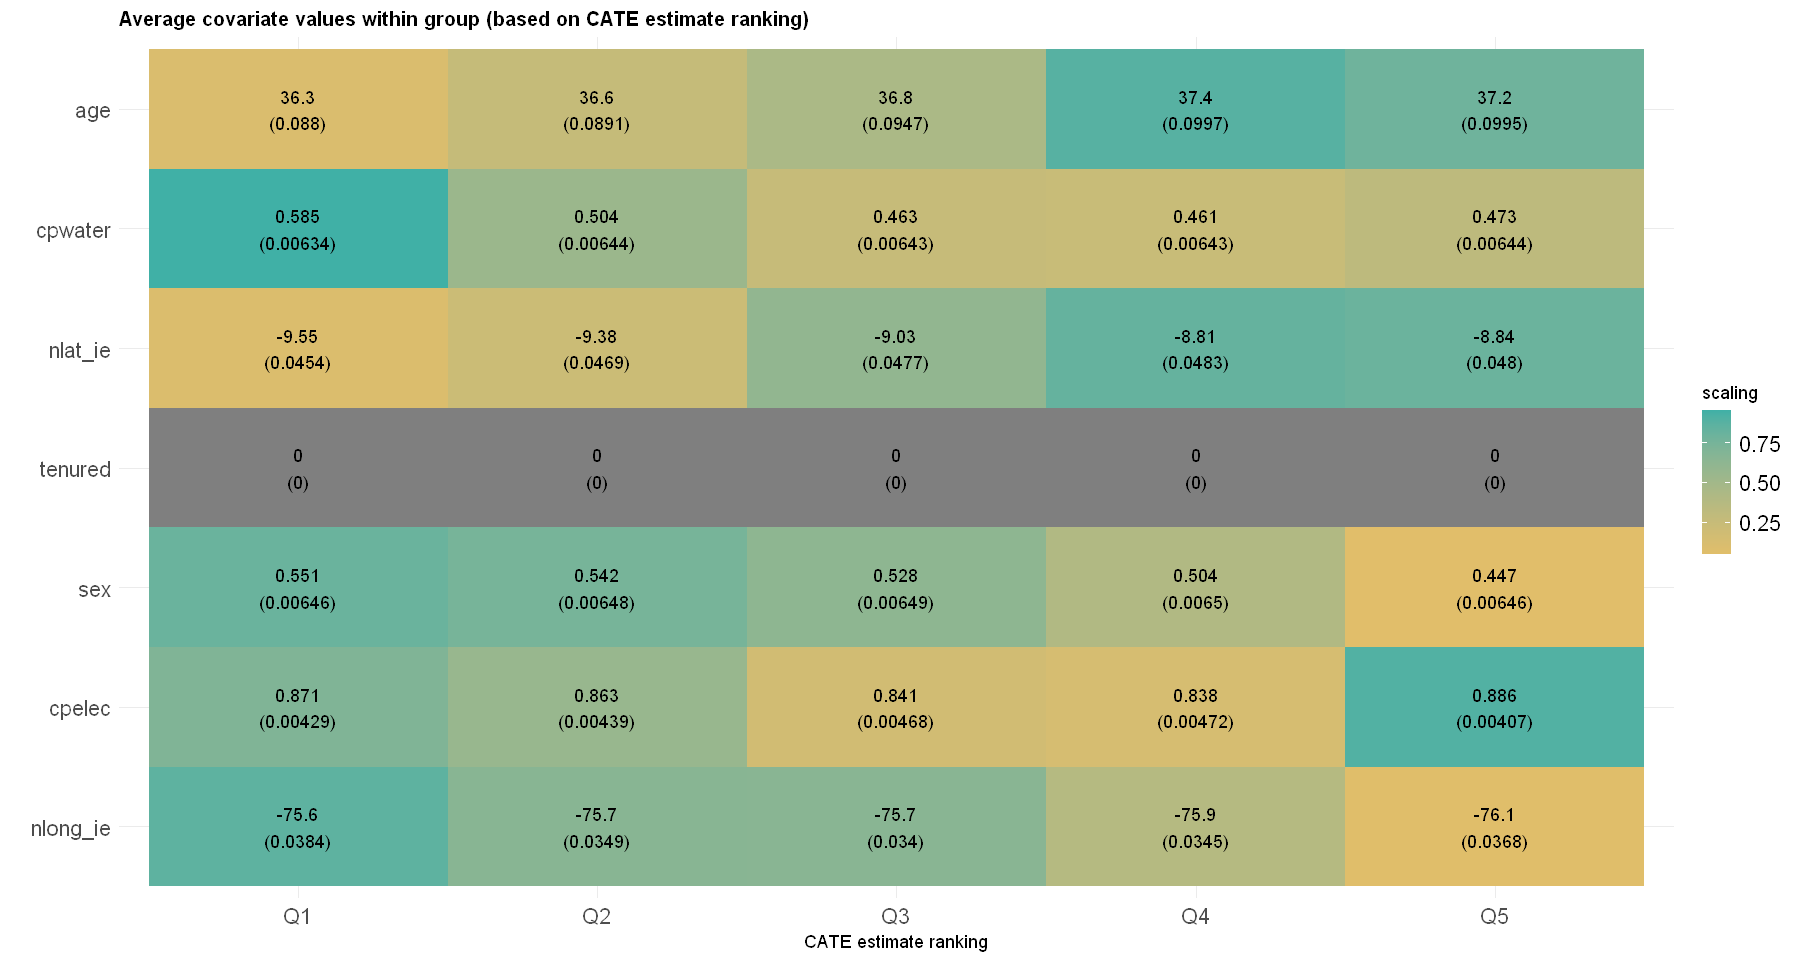

In [345]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater", "nlat_ie", "nlong_ie")

df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per ranking (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + ranking"))
      ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, ranking=paste0("Q", seq(num.rankings)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)
df <- do.call(rbind, df)


# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))

options(repr.plot.width=15, repr.plot.height=8)
# plot heatmap
ggplot(df) +
    aes(ranking, covariate) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within group (based on CATE estimate ranking)")) +
    theme_minimal() + 
    ylab("") + xlab("CATE estimate ranking") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 
options(repr.plot.width=15, repr.plot.height=8)

### Best linear projection

In [346]:
# Best linear projection of the conditional average treatment effect on covariates
best_linear_projection(forest.tau, X)


Warning message in best_linear_projection(forest.tau, X):
"Estimated treatment propensities take values between 0.075 and 1 and in particular get very close to 0 or 1."



Best linear projection of the conditional average treatment effect.
Confidence intervals are cluster- and heteroskedasticity-robust (HC3):

                          Estimate  Std. Error t value Pr(>|t|)   
(Intercept)             9.4247e-02  2.8076e-01  0.3357 0.737112   
sex                    -3.2470e-02  1.0973e-02 -2.9590 0.003089 **
age                     5.9835e-04  6.2809e-04  0.9527 0.340774   
factor.level.2         -3.1583e-02  1.5007e-02 -2.1045 0.035342 * 
factor.level.3         -2.6409e-02  1.9099e-02 -1.3827 0.166754   
factor.clasification.2 -2.5138e-03  1.6237e-02 -0.1548 0.876961   
factor.clasification.3 -8.0136e-03  1.7634e-02 -0.4544 0.649526   
cpelec                 -8.0639e-03  1.7081e-02 -0.4721 0.636865   
cpwater                -1.7371e-02  9.8861e-03 -1.7572 0.078901 . 
nlat_ie                 1.1089e-03  2.7842e-03  0.3983 0.690431   
nlong_ie                4.3619e-07  3.5412e-03  0.0001 0.999902   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.

### Assessing heterogeneity

In [347]:
test_calibration(forest.tau)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction          1.01026    0.16670  6.0603 6.877e-10 ***
differential.forest.prediction  0.66951    0.12835  5.2165 9.178e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


## 2. Using LATITUDE and LONGITUDE scalated

In [349]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater", "x_dim", "y_dim")

fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)

In [350]:
# Preparing data to fit a causal forest
# fmla <- formula(paste0("~ 0 +", paste0(covariates, collapse="+")))
XX <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]

In [351]:
forest.tau <- causal_forest(XX, Y, W)

In [352]:
# Get predictions from forest fitted above.
tau.hat <- predict(forest.tau)$predictions  # tau(X) estimates

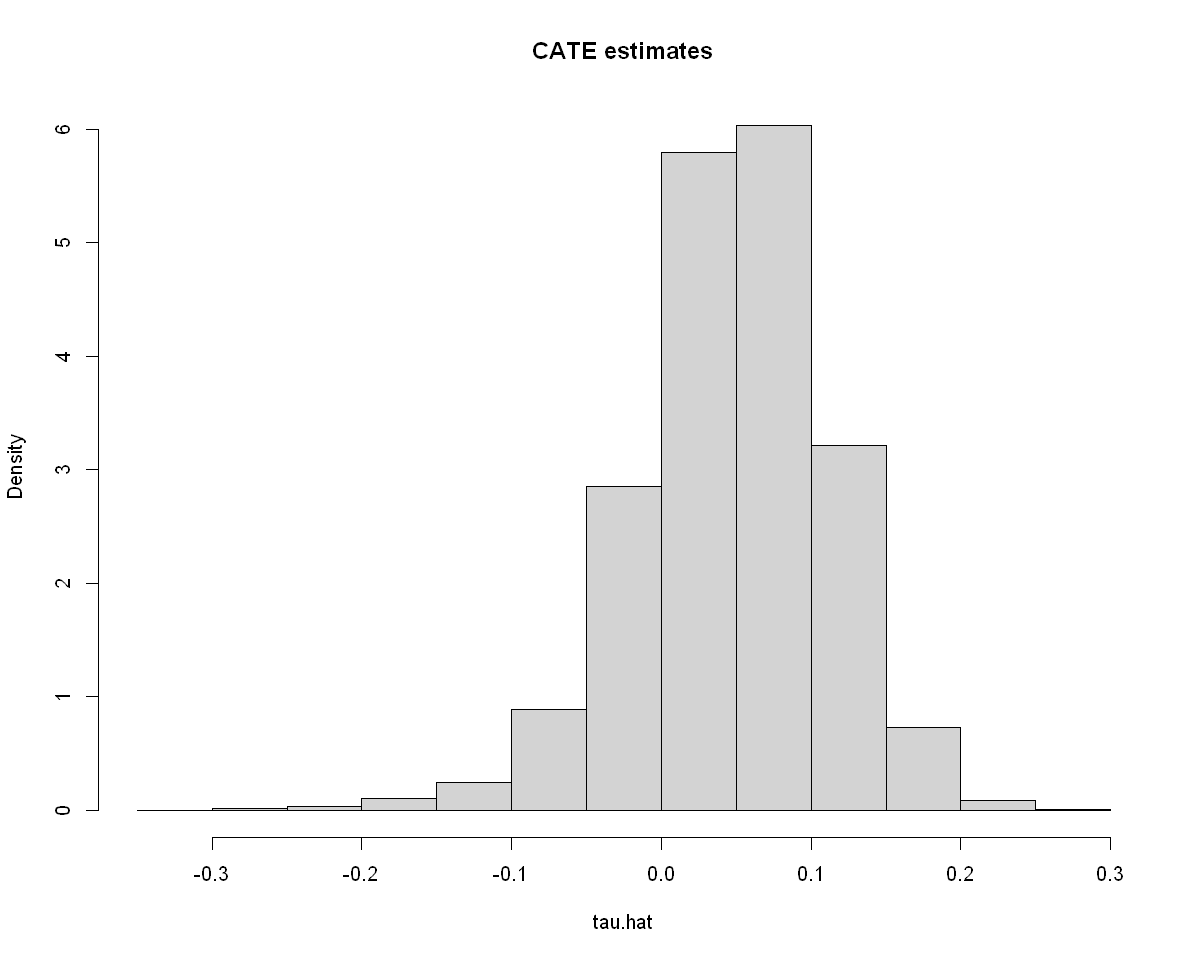

In [353]:
options(repr.plot.width=10, repr.plot.height=8)
# Do not use this for assessing heterogeneity. See text above.
hist(tau.hat, main="CATE estimates", freq=F)

In [354]:
# measure of variable importance that indicates how often a variable was used in a tree split. 
var_imp <- c(variable_importance(forest.tau))
names(var_imp) <- covariates
sorted_var_imp <- sort(var_imp, decreasing = TRUE)
sorted_var_imp[1:5]  # showing only first few

<NA>       <NA>     cpelec       <NA>        age 
0.34257448 0.34000250 0.12848110 0.08663085 0.03442845

### Data-driven subgroups

In [355]:
# Valid randomized data and observational data with unconfoundedness+overlap.
# Note: read the comments below carefully. 
# In randomized settings, do not estimate forest.e and e.hat; use known assignment probs.

covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim")

# Prepare dataset
fmla <- formula(stay ~  tenured + sex + age + 
                        factor(level) + factor(clasification)
                        + cpelec + cpwater + x_dim + y_dim)
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
n <- nrow(data)

# Number of rankings that the predictions will be ranking on 
# (e.g., 2 for above/below median estimated CATE, 5 for estimated CATE quintiles, etc.)
num.rankings <- 5  

# Prepare for data.splitting
# Assign a fold number to each observation.
# The argument 'clusters' in the next step will mimick K-fold cross-fitting.
num.folds <- 10
folds <- sort(seq(n) %% num.folds) + 1

# Comment or uncomment depending on your setting.
# Observational setting with unconfoundedness+overlap (unknown assignment probs):
# forest <- causal_forest(X, Y, W, clusters = folds)
# Randomized settings with fixed and known probabilities (here: 0.5).
forest <- causal_forest(X, Y, W, W.hat=.5, clusters = folds)

# Retrieve out-of-bag predictions.
# Predictions for observation in fold k will be computed using 
# trees that were not trained using observations for that fold.
tau.hat <- predict(forest)$predictions


# Rank observations *within each fold* into quintiles according to their CATE predictions.
ranking <- rep(NA, n)
for (fold in seq(num.folds)) {
  tau.hat.quantiles <- quantile(tau.hat[folds == fold], probs = seq(0, 1, by=1/num.rankings))
  ranking[folds == fold] <- cut(tau.hat[folds == fold], tau.hat.quantiles, include.lowest=TRUE,labels=seq(num.rankings))
}

In [356]:
# Valid only in randomized settings.
# Average difference-in-means within each ranking

# Formula y ~ 0 + ranking + ranking:w
fmla <- paste0(outcome, " ~ 0 + ranking + ranking:", treatment)
ols.ate <- lm(fmla, data=transform(data, ranking=factor(ranking)))
ols.ate <- coeftest(ols.ate, vcov=vcovHC(ols.ate, type='HC2'))
interact <- which(grepl(":", rownames(ols.ate)))
ols.ate <- data.frame("ols", paste0("Q", seq(num.rankings)), ols.ate[interact, 1:2])
rownames(ols.ate) <- NULL # just for display
colnames(ols.ate) <- c("method", "ranking", "estimate", "std.err")
ols.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
ols,Q1,-0.005157707,0.01195474
ols,Q2,0.015486608,0.01182388
ols,Q3,0.073003499,0.01187257
ols,Q4,0.065822966,0.01223258
ols,Q5,0.063732806,0.01200526


In [357]:
# Computing AIPW scores.
tau.hat <- predict(forest)$predictions
e.hat <- forest$W.hat # P[W=1|X]
m.hat <- forest$Y.hat # E[Y|X]

# Estimating mu.hat(X, 1) and mu.hat(X, 0) for obs in held-out sample
# Note: to understand this, read equations 6-8 in this vignette:
# https://grf-labs.github.io/grf/articles/muhats.html
mu.hat.0 <- m.hat - e.hat * tau.hat        # E[Y|X,W=0] = E[Y|X] - e(X)*tau(X)
mu.hat.1 <- m.hat + (1 - e.hat) * tau.hat  # E[Y|X,W=1] = E[Y|X] + (1 - e(X))*tau(X)

# AIPW scores
aipw.scores <- tau.hat + W / e.hat * (Y -  mu.hat.1) - (1 - W) / (1 - e.hat) * (Y -  mu.hat.0)
ols <- lm(aipw.scores ~ 0 + factor(ranking))
forest.ate <- data.frame("aipw", paste0("Q", seq(num.rankings)), coeftest(ols, vcov=vcovHC(ols, "HC2"))[,1:2])
colnames(forest.ate) <- c("method", "ranking", "estimate", "std.err")
rownames(forest.ate) <- NULL # just for display
forest.ate

method,ranking,estimate,std.err
<chr>,<chr>,<dbl>,<dbl>
aipw,Q1,-0.002987477,0.01147890
aipw,Q2,0.004927449,0.01138947
aipw,Q3,0.055623387,0.01140946
aipw,Q4,0.043553862,0.01159060
aipw,Q5,0.036236868,0.01153230


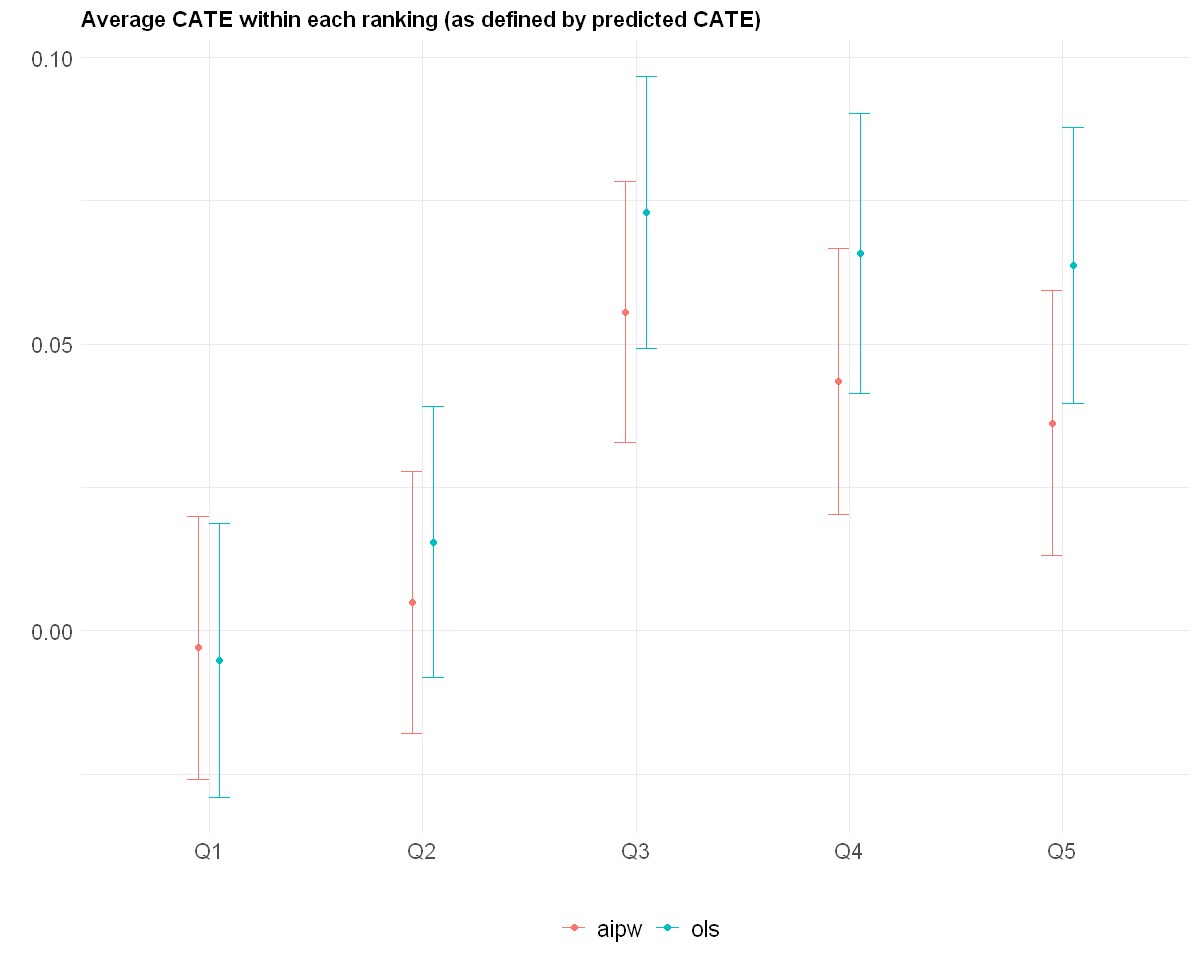

In [358]:
# Concatenate the two results.
res <- rbind(forest.ate, ols.ate)

# Plotting the point estimate of average treatment effect 
# and 95% confidence intervals around it.
options(repr.plot.width=10, repr.plot.height=8)
ggplot(res) +
  aes(x = ranking, y = estimate, group=method, color=method, fig(50,50)) + 
  geom_point(position=position_dodge(0.2)) +
  geom_errorbar(aes(ymin=estimate-2*std.err, ymax=estimate+2*std.err), width=.2, position=position_dodge(0.2)) +
  ylab("") + xlab("") +
  ggtitle("Average CATE within each ranking (as defined by predicted CATE)") +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
        axis.text=element_text(size=13), 
        legend.position="bottom", legend.title = element_blank(), legend.text = element_text(size=14))

### Test predictions using difference-in-means estimator

In [359]:
# Valid in randomized settings only.

# y ~ ranking + w + ranking:w
fmla <- paste0(outcome, "~ ranking + ", treatment, " + ranking:", treatment) 
ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
interact <- which(sapply(names(coef(ols)), function(x) grepl(":", x)))
res <- summary_rw_lm(ols, indices=interact)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.02064431,0.01694069,2.229970e-01,0.222
Rank 3 - Rank 1,0.07816121,0.01708552,4.788260e-06,0.000
Rank 4 - Rank 1,0.07098067,0.01718276,3.622985e-05,0.000
Rank 5 - Rank 1,0.06889051,0.01709878,5.616109e-05,0.000


In [360]:
# Valid in randomized and observational settings with unconfoundedness+overlap.

# Using AIPW scores computed above
ols <- lm(aipw.scores ~ 1 + factor(ranking))
res <- summary_rw_lm(ols, indices=2:num.rankings)
rownames(res) <- paste("Rank", 2:num.rankings, "- Rank 1") # just for display
res

,Estimate,Std. Error,Orig. p-value,Adj. p-value
Rank 2 - Rank 1,0.007914926,0.01623326,0.6258548012,0.6257
Rank 3 - Rank 1,0.058610864,0.01623326,0.0003060629,0.0011
Rank 4 - Rank 1,0.046541339,0.01623326,0.0041462864,0.0123
Rank 5 - Rank 1,0.039224345,0.01623326,0.0156853687,0.0301


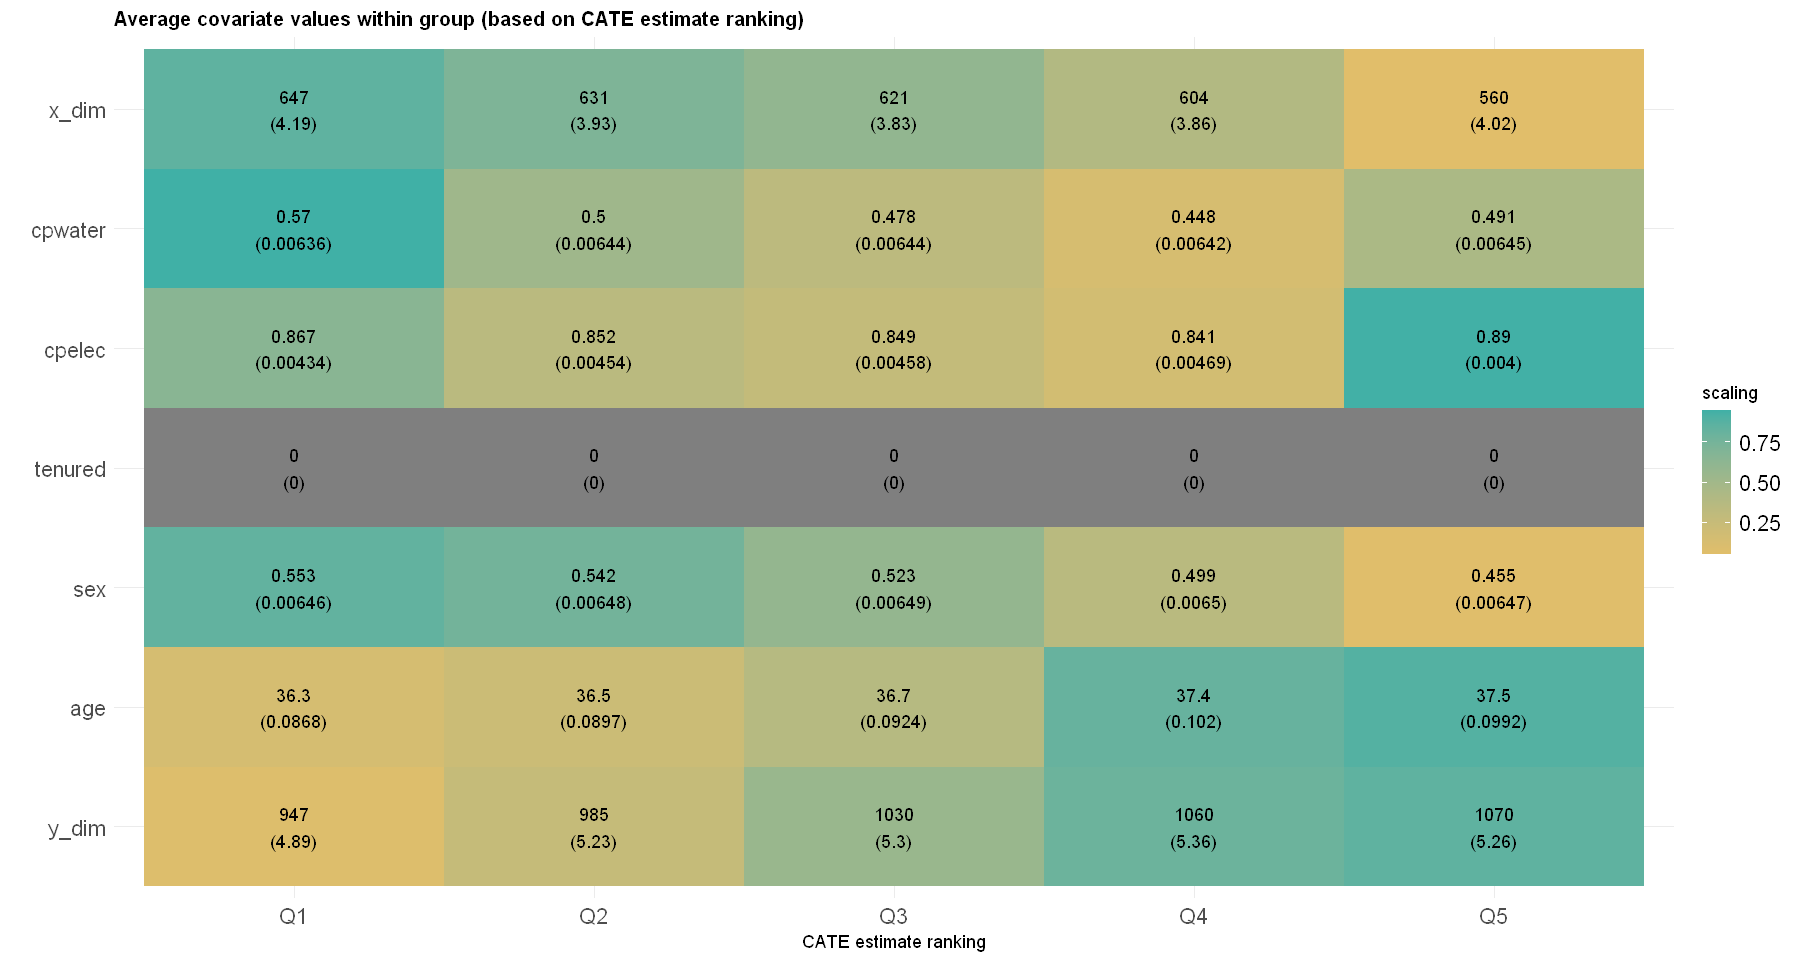

In [361]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim")
df <- mapply(function(covariate) {
      # Looping over covariate names
      # Compute average covariate value per ranking (with correct standard errors)
      fmla <- formula(paste0(covariate, "~ 0 + ranking"))
      ols <- lm(fmla, data=transform(data, ranking=factor(ranking)))
      ols.res <- coeftest(ols, vcov=vcovHC(ols, "HC2"))
    
      # Retrieve results
      avg <- ols.res[,1]
      stderr <- ols.res[,2]
      
      # Tally up results
      data.frame(covariate, avg, stderr, ranking=paste0("Q", seq(num.rankings)), 
                 # Used for coloring
                 scaling=pnorm((avg - mean(avg))/sd(avg)), 
                 # We will order based on how much variation is 'explain' by the averages
                 # relative to the total variation of the covariate in the data
                 variation=sd(avg) / sd(data[,covariate]),
                 # String to print in each cell in heatmap below
                 labels=paste0(signif(avg, 3), "\n", "(", signif(stderr, 3), ")"))
}, covariates, SIMPLIFY = FALSE)
df <- do.call(rbind, df)


# a small optional trick to ensure heatmap will be in decreasing order of 'variation'
df$covariate <- reorder(df$covariate, order(df$variation))

options(repr.plot.width=15, repr.plot.height=8)
# plot heatmap
ggplot(df) +
    aes(ranking, covariate) +
    geom_tile(aes(fill = scaling)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "#E1BE6A", high = "#40B0A6") +
    ggtitle(paste0("Average covariate values within group (based on CATE estimate ranking)")) +
    theme_minimal() + 
    ylab("") + xlab("CATE estimate ranking") +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

### Best linear projection

In [362]:
# Best linear projection of the conditional average treatment effect on covariates
best_linear_projection(forest.tau, X)

Warning message in best_linear_projection(forest.tau, X):
"Estimated treatment propensities take values between 0.075 and 1 and in particular get very close to 0 or 1."



Best linear projection of the conditional average treatment effect.
Confidence intervals are cluster- and heteroskedasticity-robust (HC3):

                          Estimate  Std. Error t value Pr(>|t|)   
(Intercept)             6.8032e-02  5.9881e-02  1.1361 0.255915   
sex                    -3.3398e-02  1.0824e-02 -3.0855 0.002034 **
age                     6.6293e-04  6.2728e-04  1.0568 0.290591   
factor.level.2         -3.0136e-02  1.5253e-02 -1.9757 0.048198 * 
factor.level.3         -2.4813e-02  1.9009e-02 -1.3053 0.191797   
factor.clasification.2 -2.5553e-04  1.6481e-02 -0.0155 0.987630   
factor.clasification.3 -7.6925e-03  1.7773e-02 -0.4328 0.665150   
cpelec                 -1.6304e-03  1.7250e-02 -0.0945 0.924702   
cpwater                -1.9129e-02  9.8484e-03 -1.9424 0.052101 . 
x_dim                  -1.0160e-06  3.0016e-05 -0.0338 0.972997   
y_dim                   8.5940e-06  2.3773e-05  0.3615 0.717723   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.

### Assessing heterogeneity

In [363]:
test_calibration(forest.tau)


Best linear fit using forest predictions (on held-out data)
as well as the mean forest prediction as regressors, along
with one-sided heteroskedasticity-robust (HC3) SEs:

                               Estimate Std. Error t value    Pr(>t)    
mean.forest.prediction          0.98939    0.16304  6.0685 6.533e-10 ***
differential.forest.prediction  0.69370    0.12671  5.4746 2.211e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


### Partial dependence

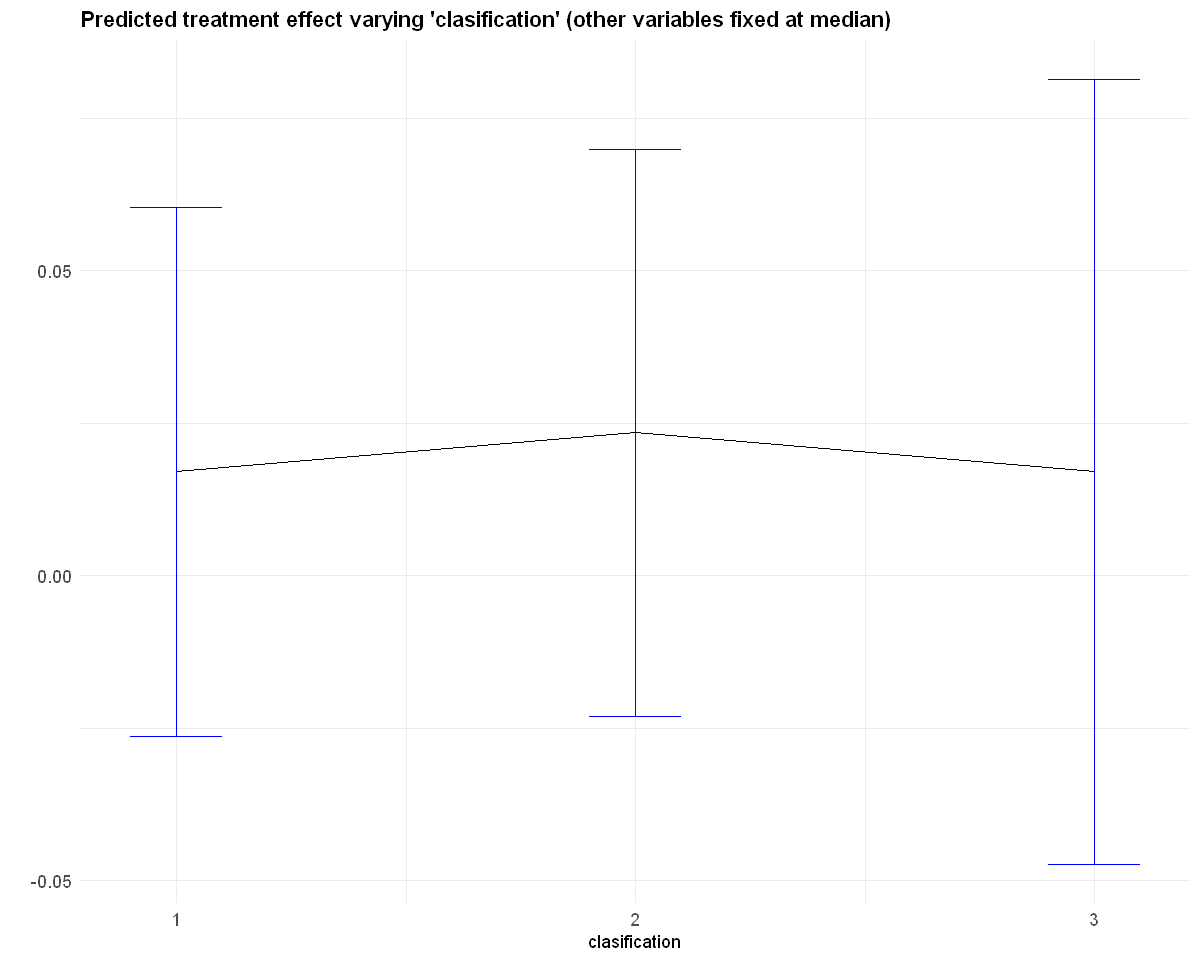

In [371]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim", "clasification", "level")
selected.covariate <- "clasification"
# other.covariates <- covariates
other.covariates <- covariates[which(covariates != selected.covariate)]

# Fitting a forest 
# (commented for convenience; no need re-fit if already fitted above)
fmla <- formula(paste0("~ 0 + ", paste0(covariates, collapse="+")))
# fmla <- formula(stay ~  tenured + sex + age + 
#                         factor(level) + factor(clasification)
#                         + cpelec + cpwater + x_dim + y_dim)
# Note: For smaller confidence intervals, set num.trees ~ sample size
X <- model.matrix(fmla, data)
W <- data[,treatment]
Y <- data[,outcome]
forest.tau <- causal_forest(X, Y, W, W.hat=.5)  # few trees for speed here

# Compute a grid of values appropriate for the selected covariate
grid.size <- 3 
covariate.grid <- seq(min(data[,selected.covariate]), max(data[,selected.covariate]), length.out=grid.size)

# Other options for constructing a grid:
# For a binary variable, simply use 0 and 1
# grid.size <- 3
# covariate.grid <- c(0,2)  

# For a continuous variable, select appropriate percentiles
# percentiles <- c(1,2,3)
# grid.size <- length(percentiles)
# covariate.grid <- quantile(data[,selected.covariate], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct a dataset
data.grid <- data.frame(sapply(medians, function(x) rep(x, grid.size)), covariate.grid)
colnames(data.grid) <- c(other.covariates, selected.covariate)


# Expand the data
X.grid <- model.matrix(fmla, data.grid)

# Point predictions of the CATE and standard errors 
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)

tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)
                               
# Plot predictions for each group and 95% confidence intervals around them.
options(repr.plot.width=10, repr.plot.height=8)
data.pred <- transform(data.grid, tau.hat=tau.hat, ci.low = tau.hat - 2*tau.hat.se, ci.high = tau.hat + 2*tau.hat.se)
ggplot(data.pred) +
  geom_line(aes_string(x=selected.covariate, y="tau.hat", group = 1), color="black") +
  geom_errorbar(aes_string(x=selected.covariate, ymin="ci.low", ymax="ci.high", width=.2), color="blue") +
   ylab("") +
  ggtitle(paste0("Predicted treatment effect varying '", selected.covariate, "' (other variables fixed at median)")) +
  scale_x_continuous("clasification", breaks=covariate.grid, labels=signif(covariate.grid, 2)) +
  theme_minimal() +
  theme(plot.title = element_text(size = 13, face = "bold"),
       axis.text=element_text(size=11)) 

In [373]:
with(data, mean(clasification == 3))

[1] 0.4982098

In [380]:
mean(with(data, (clasification == 3) & (abs(age - median(age)) <= 30))) # at most 3 yrs away

[1] 0.4980747

In [382]:
x1 <- 'clasification'
x2 <- 'age'

In [396]:
table(data["age"])


  21   22   23   24   25   26   27   28   29   30   31   32   33   34   35   36 
  44  129  283  348  386  463  670  979 1179 1364 1402 1532 1559 1726 1608 1559 
  37   38   39   40   41   42   43   44   45   46   47   48   49   50   51   52 
1552 1461 1373 1342 1242 1115 1020  887  776  662  552  483  371  318  256  179 
  53   54   55   56   57   58   59   60   61   62   63   64   65   66   67   68 
 146  124   99   92   74   47   42   46   28   30   27   16    4    6    2    3 

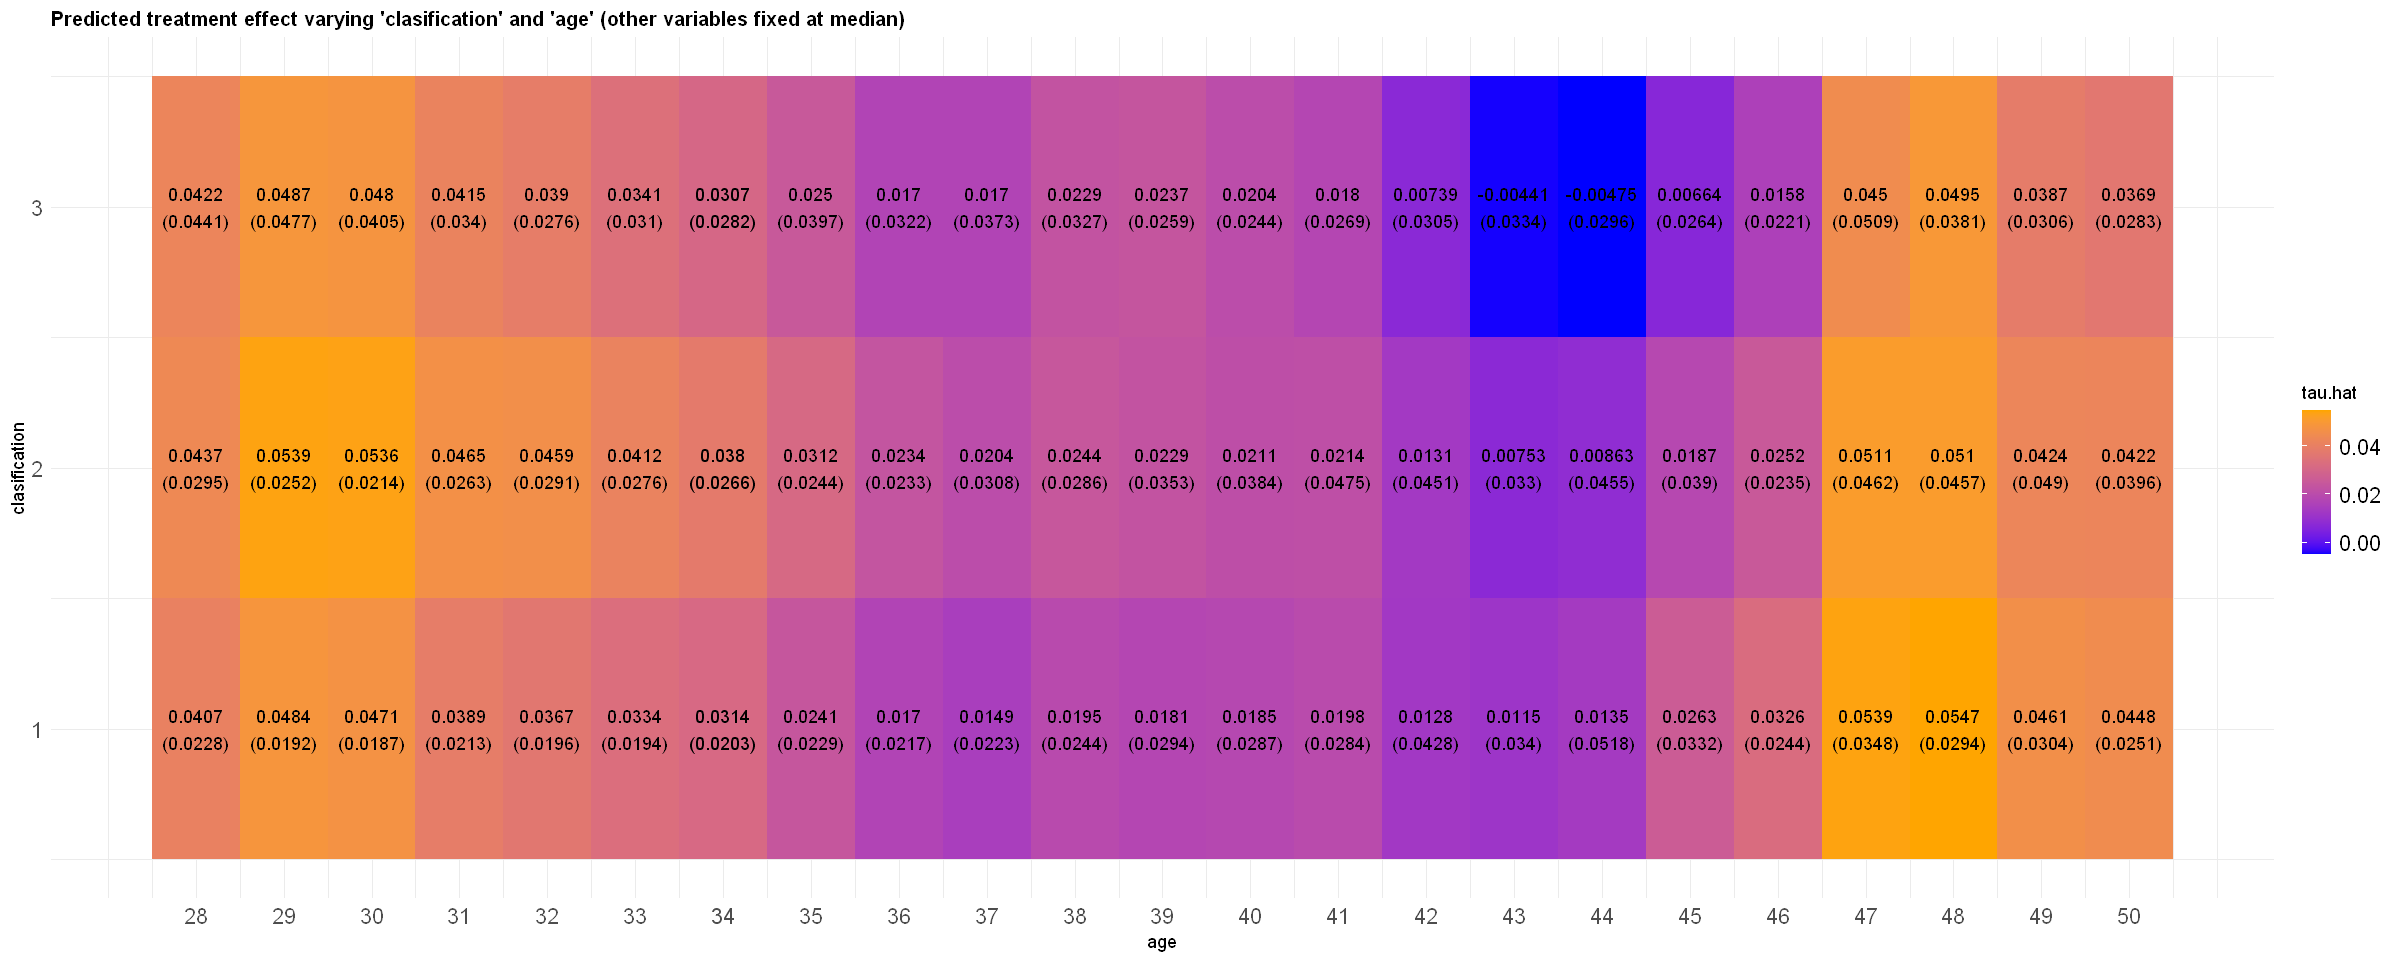

In [440]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim", "clasification", "level")

x1 <- 'clasification'
x2 <- 'age'
selected.covariates <- c(x1, x2)
other.covariates <- covariates[-which(covariates %in% selected.covariates)]

# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.
x1.grid.size <- 3

percentiles <- c(0.1, 0.15, 0.18, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 
                 0.55, 0.6, 0.65, 0.7, 0.72, 0.75, 0.8, 0.85, 0.87, 0.9, 
                 0.91, 0.92, 0.94, 0.95)
x2.grid.size <- length(percentiles)
x2.grid <- quantile(data[,x2], probs=percentiles)

# x2.grid.size <- 48
x1.grid <- seq(min(data[,x1]), max(data[,x1]), length.out=x1.grid.size)
# x2.grid <- seq(min(data[,x2]), max(data[,x2]), length.out=x2.grid.size)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct dataset
data.grid <- data.frame(
                sapply(medians, function(x) rep(x, grid.size)), 
                expand.grid(x1.grid, x2.grid))
colnames(data.grid) <- c(other.covariates, selected.covariates)

# Expand the data according to formula used to fit forest
X.grid <- model.matrix(fmla, data.grid)

# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

# A vector of labels for plotting below
labels <- mapply(function(est, se) paste0(signif(est, 3), "\n", "(", signif(se, 3), ")"), tau.hat, tau.hat.se)
df <- data.frame(X.grid, tau.hat, labels)

# Plotting
options(repr.plot.width=20, repr.plot.height=8)
ggplot(df) +
    aes(age, clasification) +
    geom_tile(aes(fill = tau.hat)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "blue", high = "orange") +
    scale_y_continuous("clasification", breaks=x1.grid, labels=signif(x1.grid, 2)) +
    scale_x_continuous("age", breaks=x2.grid, labels=signif(x2.grid, 2)) +
    ggtitle(paste0("Predicted treatment effect varying '", x1, "' and '", x2, "' (other variables fixed at median)")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

In [447]:
x1.grid.size

[1] 5

In [448]:
x2.grid.size

[1] 5

In [449]:
medians

tenured           sex           age        cpelec       cpwater 
          0.0           1.0          36.0           1.0           0.5 
clasification         level 
          2.0           2.0

In [441]:
covariates = c("tenured", "sex", "age", "cpelec", "cpwater",  "x_dim", "y_dim", "clasification", "level")

x1 <- 'x_dim'
x2 <- 'y_dim'
selected.covariates <- c(x1, x2)
other.covariates <- covariates[-which(covariates %in% selected.covariates)]

# Compute a grid of values appropriate for the selected covariate
# See other options for constructing grids in the snippet above.

percentiles <- c(0.1, 0.25, 0.5, 0.75, 0.9)
x1.grid.size <- length(percentiles)
x1.grid <- quantile(data[,x1], probs=percentiles)

x2.grid.size <- length(percentiles)
x2.grid <- quantile(data[,x2], probs=percentiles)

# Take median of other covariates 
medians <- apply(data[, other.covariates, F], 2, median)

# Construct dataset
data.grid <- data.frame(
                sapply(medians, function(x) rep(x, grid.size)), 
                expand.grid(x1.grid, x2.grid))
colnames(data.grid) <- c(other.covariates, selected.covariates)

# Expand the data according to formula used to fit forest
X.grid <- model.matrix(fmla, data.grid)

# Forest-based point estimates of CATE and standard errors around them
forest.pred <- predict(forest.tau, newdata = X.grid, estimate.variance=TRUE)
tau.hat <- forest.pred$predictions
tau.hat.se <- sqrt(forest.pred$variance.estimates)

# A vector of labels for plotting below
labels <- mapply(function(est, se) paste0(signif(est, 3), "\n", "(", signif(se, 3), ")"), tau.hat, tau.hat.se)
df <- data.frame(X.grid, tau.hat, labels)

# Plotting
options(repr.plot.width=20, repr.plot.height=8)
ggplot(df) +
    aes(x_sim, y_dim) +
    geom_tile(aes(fill = tau.hat)) + 
    geom_text(aes(label = labels)) +
    scale_fill_gradient(low = "blue", high = "orange") +
    scale_y_continuous("clasification", breaks=x1.grid, labels=signif(x1.grid, 2)) +
    scale_x_continuous("age", breaks=x2.grid, labels=signif(x2.grid, 2)) +
    ggtitle(paste0("Predicted treatment effect varying '", x1, "' and '", x2, "' (other variables fixed at median)")) +
    theme_minimal() +
    theme(plot.title = element_text(size = 12, face = "bold"),
          axis.text=element_text(size=13), 
          legend.text = element_text(size=13)) 

ERROR: Error in data.frame(sapply(medians, function(x) rep(x, grid.size)), expand.grid(x1.grid, : arguments imply differing number of rows: 3, 25
